In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pickle
import os
import base64
from os import listdir
import csv
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/drive/My Drive/Final Year 2024 PPS/Sanjeev_doc/post_dict.pickle'


with open(file_path, 'rb') as f:
    encoded_data = f.read()

# Decode the Base64-encoded data
decoded_bytes = base64.b64decode(encoded_data)

# Deserialize the object using pickle
img_dict = pickle.loads(decoded_bytes)
print(img_dict.keys())


dict_keys(['x', 'y'])


In [ ]:
print(len(img_dict['y']),len(img_dict['x']))

1700 1700


In [ ]:
import numpy as np
from scipy.ndimage import zoom

x_resized = []
y_resized = []

for i in img_dict['x']:
    resized_x = zoom(i, (208/i.shape[0], 208/i.shape[1], 1), order=1)
    x_resized.append(resized_x)

for i in img_dict['y']:

    y_resized.append(i)

# Convert lists to numpy arrays
x_resized = np.array(x_resized)
y_resized = np.array(y_resized)

print("Resized x shape:", x_resized.shape)
print("Resized y shape:", y_resized.shape)


Resized x shape: (1700, 208, 208, 3)
Resized y shape: (1700, 5)


In [ ]:
x_data=[]
y_data=[]
y_resized=y_resized.astype(float)
y_resized.shape
x_resized.shape
print(y_resized[0])
for i in range(len(y_resized)):
    for j in range(5):
        y_data.append(y_resized[i])
len(y_data)

[0.17 0.19 0.22 0.19 0.23]


8500

In [ ]:

for img in x_resized:
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    img_blur= cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    img_blur=np.expand_dims(img_blur, axis=-1)
    x_data.append(img_blur)

    edges = cv2.Canny(img, 100, 200)
    edges=np.expand_dims(edges, axis=-1)
    x_data.append(edges)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    thresh=np.expand_dims(thresh, axis=-1)
    x_data.append(thresh)

    datagen = ImageDataGenerator(
    rotation_range=20,
    #     width_shift_range=0.2,
    #     height_shift_range=0.2,
    #     shear_range=0.2,
    #     zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    img = img.reshape((1,) + img.shape)


    augmented_images = []
    num_augmented_images = 2  # Number of augmented images to generate

    for _ in range(num_augmented_images):
        for batch in datagen.flow(img, batch_size=1):
            augmented_images.append(batch[0].astype('uint8'))
            break
    for i in augmented_images:
        i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        i=np.expand_dims(i,axis=-1)

        x_data.append(i)








In [ ]:
for i,x in enumerate(x_data):
    print(x.shape)
    print(y_data[i])
    plt.imshow(x,cmap='gray')
    plt.show()
    if i==20:
        break

Output hidden; open in https://colab.research.google.com to view.

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dropout,MaxPooling2D,Dense,Input,Reshape, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
import math
from tensorflow.keras.optimizers import Adam

In [ ]:
x_data=np.array(x_data)
y_data=np.array(y_data)
print(x_data.shape,"   ",y_data.shape)

(8500, 208, 208, 1)     (8500, 5)


In [4]:
input_cla=Input(shape=(208,208,1))
fm_size=16
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(input_cla)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

fm_size=fm_size*2
x=Conv2D(fm_size,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x=MaxPooling2D((2,2),padding='same')(x)

em_size=math.ceil(208/(2**8))
x = Reshape((em_size * em_size * fm_size,))(x)
dropout_rate=0.5
x=Dense(128,activation='relu',input_shape=(em_size*em_size*fm_size,))(x)
x = Dropout(dropout_rate)(x)
x=Dense(64,activation='relu')(x)
x = Dropout(dropout_rate)(x)
x=Dense(32,activation='relu')(x)
x = Dropout(dropout_rate)(x)
x=Dense(16,activation='relu')(x)
x = Dropout(dropout_rate)(x)
output=Dense(5)(x)

classifier=Model(input_cla,output)
# adam = Adam(learning_rate=1e-4)
# adam=Adam
loss = MeanSquaredError()
classifier.compile(optimizer='adam', loss=loss, metrics = [tf.keras.metrics.MeanSquaredError()])

classifier.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 208, 208, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 208, 208, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 208, 208, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 104, 104, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 104, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 104, 104, 32)      128   

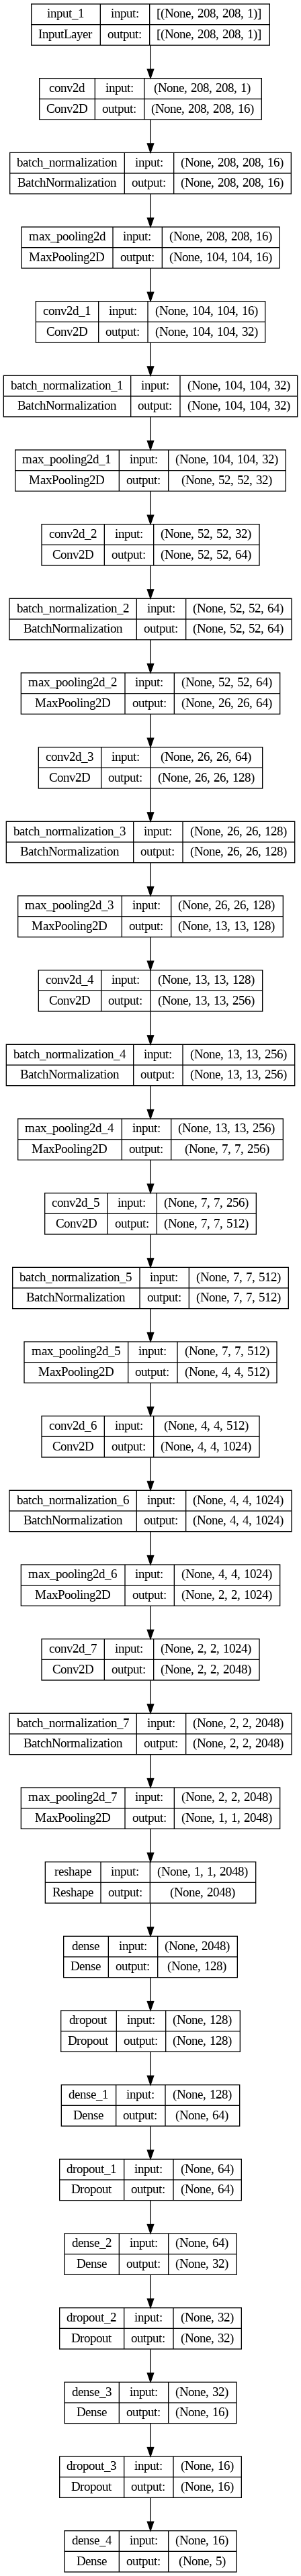

In [5]:
from tensorflow.keras.utils import plot_model

# Save the model summary diagram as an image file
plot_model(classifier, to_file='/content/drive/My Drive/Final Year 2024 PPS/Sanjeev_doc/profile_synthetic.png', show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.3, patience=5, verbose=1)

# Train the model with the callback
history = classifier.fit(x_data, y_data, epochs=10, batch_size=64, callbacks=[reduce_lr], validation_split=0.2)


Epoch 1/10
107/107 [==============================] - 11s 106ms/step - loss: 7.3559e-04 - mean_squared_error: 7.3559e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 3.0000e-04
Epoch 2/10
107/107 [==============================] - 11s 105ms/step - loss: 7.3590e-04 - mean_squared_error: 7.3590e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 3.0000e-04
Epoch 3/10
107/107 [==============================] - 11s 105ms/step - loss: 7.3665e-04 - mean_squared_error: 7.3665e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 3.0000e-04
Epoch 4/10
107/107 [==============================] - 11s 105ms/step - loss: 7.3565e-04 - mean_squared_error: 7.3565e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 3.0000e-04
Epoch 5/10
107/107 [==============================] - 11s 103ms/step - loss: 7.3566e-04 - mean_squared_error: 7.3566e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 3.0000e-04
Epoch 6/10
107/107 [==============================

In [ ]:
import cv2
import numpy as np

x_gray = []
for img in x_resized:
    img_arr_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_arr_gray_expanded = np.expand_dims(img_arr_gray, axis=-1)
    x_gray.append(img_arr_gray_expanded)
x_gray = np.array(x_gray)
x_gray.shape


(1700, 208, 208, 1)

In [ ]:
x_train=x_gray
y_train=y_resized

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

val_preds=classifier.predict(x_train)

mse=history.history['loss'][-1]
val_mse=history.history['val_loss'][-1]

mae=mean_absolute_error(y_train,val_preds)

rmse=np.sqrt(val_mse)
r2 = r2_score(y_train, val_preds)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Validation Mean Squared Error (val_MSE):", val_mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 score:", r2)

54/54 [==============================] - 1s 17ms/step
Mean Squared Error (MSE): 0.0007355855777859688
Validation Mean Squared Error (val_MSE): 0.0010649076430127025
Mean Absolute Error (MAE): 0.02190377110887968
Root Mean Squared Error (RMSE): 0.03263292268572802
R^2 score: -0.006439087771204078


In [ ]:
# Save model architecture, weights, and optimizer state
classifier.save('/content/drive/My Drive/Final Year 2024 PPS/Sanjeev_doc/post_model_synthetic.keras')

# Save training history
np.save('/content/drive/My Drive/Final Year 2024 PPS/Sanjeev_doc/post_history_synthetic.npy', history.history)


In [ ]:
from keras.models import load_model

# Load the model
classifier = load_model('/content/drive/My Drive/Final Year 2024 PPS/Sanjeev_doc/post_model_synthetic.keras')



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.3, patience=5, verbose=1)

# Train the model with the callback
history = classifier.fit(x_data, y_data, epochs=10, batch_size=64, callbacks=[reduce_lr], validation_split=0.2)


Epoch 1/10
107/107 [==============================] - 31s 142ms/step - loss: 7.3628e-04 - mean_squared_error: 7.3628e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 0.0010
Epoch 2/10
107/107 [==============================] - 11s 101ms/step - loss: 7.3571e-04 - mean_squared_error: 7.3571e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 0.0010
Epoch 3/10
107/107 [==============================] - 11s 102ms/step - loss: 7.3589e-04 - mean_squared_error: 7.3589e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 0.0010
Epoch 4/10
107/107 [==============================] - 11s 103ms/step - loss: 7.3583e-04 - mean_squared_error: 7.3583e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 0.0010
Epoch 5/10
107/107 [==============================] - 11s 104ms/step - loss: 7.3691e-04 - mean_squared_error: 7.3691e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - lr: 0.0010
Epoch 6/10
107/107 [==============================] - ETA: 0s - loss: 